In [156]:
# Load the all libraries we need for ML 
%matplotlib inline

import os
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential
import seaborn as sns

#check all the files in the input dataset
#os.chdir("fifteen_minute_data_newyork.csv")
df = pd.read_csv('fifteen_minute_data_newyork.csv')

#print(os.listdir("fifteen_minute_data_newyork.csv"))

# Get the name of the directory containing the files
# Read data from file 'filename.csv' 
pd.read_csv('fifteen_minute_data_newyork.csv', delimiter=',',skiprows=1)

article_read = pd.read_csv(
    'fifteen_minute_data_newyork.csv', 
    delimiter=',', 
)

#Let's use datetime(2012-10-01 12:00:00,...) as index instead of numbers(0,1,...)
#This will be helpful for further data analysis as we are dealing with time series data
#df = pd.read_csv(fpath, index_col='local_15min', parse_dates=['local_15min'])
#df.head()

article_read[['dataid', 'local_15min', 'grid']] #shows only slected colomns 

#article_read.count()


# Get the name of the directory containing the files
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based), format: data/test_file.csv
#data = pd.read_csv(Users/valeriamaksimovich/'fifteen_minute_data_newyork.csv')
#pd.read_csv('15minute_data_newyork.csv')
#print(data.head(10))



#import os # Import the os module
#cwd = os.getcwd() # Get the current working directory
#print("Current working directory: {0}".format(cwd)) # Print the current working directory




,dataid,local_15min,grid
0,4550,2019-06-24 14:45:00-05,0.110
1,4550,2019-06-24 14:30:00-05,0.169
2,4550,2019-06-24 14:15:00-05,0.122
3,4550,2019-06-24 14:00:00-05,0.159
4,558,2019-06-24 14:45:00-05,0.442
...,...,...,...
441594,3996,2019-10-31 22:00:00-05,1.428
441595,914,2019-10-31 23:45:00-05,0.360
441596,914,2019-10-31 23:30:00-05,0.548
441597,914,2019-10-31 23:15:00-05,0.539


# Explanations
**article_read** is this file: 'fifteen_minute_data_newyork.csv'

**df_old** is used just to delete the first column (numbering) 0,1,2,3,4

**df** is time and grid cinsumpton


In [157]:
pwd

'/Users/valeriamaksimovich'

In [158]:
#just all the data 

fpath='fifteen_minute_data_newyork.csv'

df=pd.read_csv(fpath)
df.head()

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,4550,2019-06-24 14:45:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.625,120.750
1,4550,2019-06-24 14:30:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.456,120.558
2,4550,2019-06-24 14:15:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.513,120.629
3,4550,2019-06-24 14:00:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,121.567,121.638
4,558,2019-06-24 14:45:00-05,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.390,120.388


In [159]:

#checking missing data
#df.isna().sum()

## df1 as an example data frame 
## col1 name of column for which you want to calculate the nan values
sum(pd.isnull(['grid']))

0

In [160]:
#article_read.filter(regex = '914', axis = 1 ) 

article_read[article_read['dataid']==914][['dataid','local_15min', 'grid', 'car1', 'solar', 'solar2', 'battery1']] #filtering, counting the colomns: .isna().sum() 
#.hist() 

#article_read[['dataid', 'local_15min', 'grid', 'local_15min', 'grid', 'air1', 'air2', 'air3', 'waterheater2', 'wellpump1',]]
    
#(article_read[article_read['dataid']==914].isna().sum() # counting the colomns: .isna().sum() - identifying which things hve values 

,dataid,local_15min,grid,car1,solar,solar2,battery1
100,914,2019-06-24 14:45:00-05,-3.311,NaN,3.831,NaN,NaN
101,914,2019-06-24 14:30:00-05,-2.354,NaN,2.971,NaN,NaN
102,914,2019-06-24 14:15:00-05,-2.126,NaN,2.582,NaN,NaN
103,914,2019-06-24 14:00:00-05,-2.418,NaN,2.783,NaN,NaN
208,914,2019-06-24 15:45:00-05,-2.019,NaN,2.488,NaN,NaN
...,...,...,...,...,...,...,...
441426,914,2019-10-31 22:00:00-05,0.623,NaN,-0.002,NaN,NaN
441595,914,2019-10-31 23:45:00-05,0.360,NaN,-0.003,NaN,NaN
441596,914,2019-10-31 23:30:00-05,0.548,NaN,-0.003,NaN,NaN
441597,914,2019-10-31 23:15:00-05,0.539,NaN,-0.003,NaN,NaN


# Visualisation

In [161]:
df_old= pd.read_csv('fifteen_minute_data_newyork.csv', index_col='local_15min', parse_dates=['local_15min'])

df_old.head()

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
local_15min,,,,,,,,,,,,,,,,,,,,,
2019-06-24 14:45:00-05:00,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.625,120.750
2019-06-24 14:30:00-05:00,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.456,120.558
2019-06-24 14:15:00-05:00,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.513,120.629
2019-06-24 14:00:00-05:00,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,121.567,121.638
2019-06-24 14:45:00-05:00,558,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.390,120.388


In [162]:
df= df_old[df_old['dataid']==914][['grid']]

df.head()

,grid
local_15min,
2019-06-24 14:45:00-05:00,-3.311
2019-06-24 14:30:00-05:00,-2.354
2019-06-24 14:15:00-05:00,-2.126
2019-06-24 14:00:00-05:00,-2.418
2019-06-24 15:45:00-05:00,-2.019


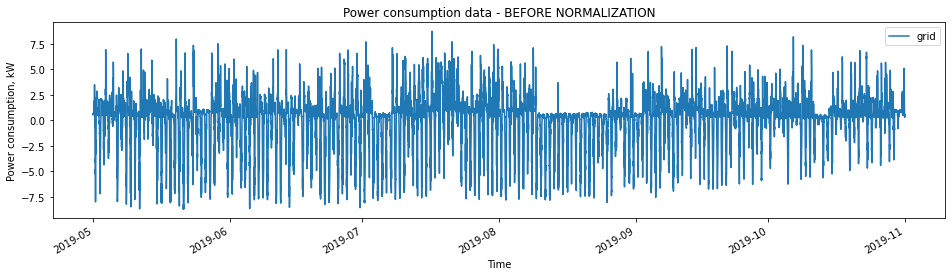

In [163]:
#plotting things, taken from https://www.kaggle.com/msripooja/hourly-energy-consumption-time-series-rnn-lstm

#article_read[article_read['dataid']==914][['local_15min','grid']] #filtering, counting the colomns: .isna().sum() 
#.hist() 
#article_read[article_read['dataid']==914]['grid'].plot(figsize=(16,4),legend=True)

#plt.ylabel('Consumption from the grid, kW')

#plt.xlabel('Time')

#plt.title('Power consumption data - 15 min - BEFORE NORMALIZATION')

#plt.show()


df.plot(figsize=(16,4),legend=True)

plt.title('Power consumption data - BEFORE NORMALIZATION')

plt.ylabel('Power consumption, kW')

plt.xlabel('Time')

plt.show()


In [164]:
df_sol= df_old[df_old['dataid']==914][['solar']]

df_sol.head()

,solar
local_15min,
2019-06-24 14:45:00-05:00,3.831
2019-06-24 14:30:00-05:00,2.971
2019-06-24 14:15:00-05:00,2.582
2019-06-24 14:00:00-05:00,2.783
2019-06-24 15:45:00-05:00,2.488


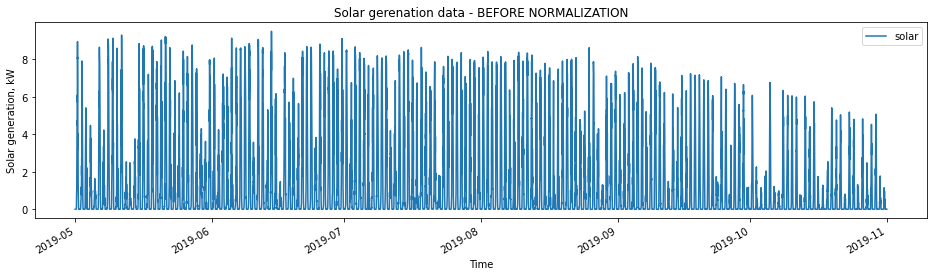

In [165]:
#article_read[article_read['dataid']==914]['solar'].plot(figsize=(16,4),legend=True)
#plt.title('Solar gerenation data - 15 min - BEFORE NORMALIZATION')
#plt.ylabel('Solar generation, kW')
#plt.xlabel('Time')
#plt.show()
#article_read[article_read['dataid']==914]['grid'].hist()

df_sol.plot(figsize=(16,4),legend=True)

plt.title('Solar gerenation data - BEFORE NORMALIZATION')

plt.ylabel('Solar generation, kW')

plt.xlabel('Time')

plt.show()

In [166]:
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df_sol['solar']=scaler.fit_transform(df_sol['solar'].values.reshape(-1,1))
    return df

df_sol_norm = normalize_data(df)
df_sol_norm.shape

(17664, 1)

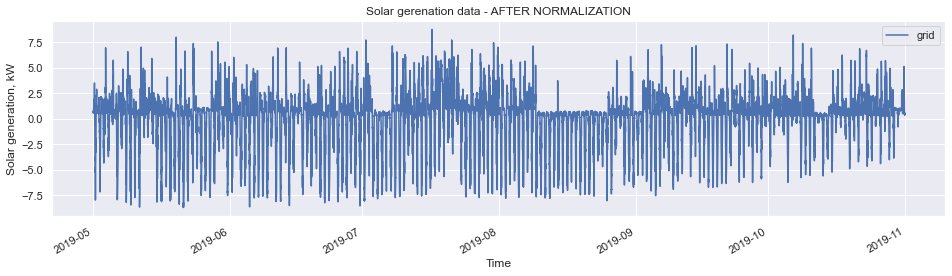

<AxesSubplot:xlabel='local_15min'>

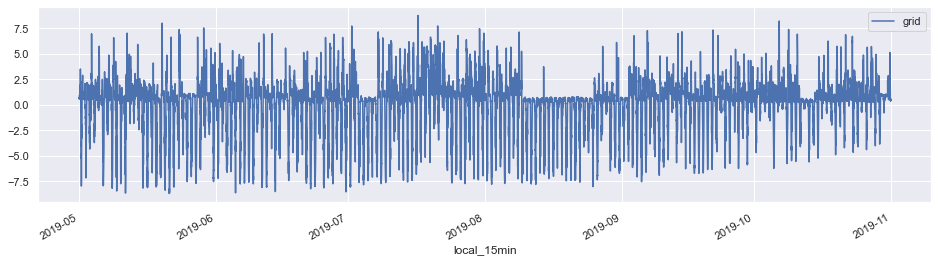

In [174]:
df_sol_norm.plot(figsize=(16,4),legend=True)

plt.title('Solar gerenation data - AFTER NORMALIZATION')

plt.ylabel('Solar generation, kW')

plt.xlabel('Time')

plt.show()

df_sol_norm.plot(figsize=(16,4),legend=True)

In [173]:
#Let's use datetime(2012-10-01 12:00:00,...) as index instead of numbers(0,1,...)
#This will be helpful for further data analysis as we are dealing with time series data

df_old= pd.read_csv('fifteen_minute_data_newyork.csv', index_col='local_15min', parse_dates=['local_15min'])

df_old.head()

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
local_15min,,,,,,,,,,,,,,,,,,,,,
2019-06-24 14:45:00-05:00,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.625,120.750
2019-06-24 14:30:00-05:00,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.456,120.558
2019-06-24 14:15:00-05:00,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.513,120.629
2019-06-24 14:00:00-05:00,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,121.567,121.638
2019-06-24 14:45:00-05:00,558,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.390,120.388


In [11]:
#df= df_old[df['dataid']==914]['grid']
#df.head()

df= df_old[df_old['dataid']==914][['grid']]

df.head()

,grid
local_15min,
2019-06-24 14:45:00-05:00,-3.311
2019-06-24 14:30:00-05:00,-2.354
2019-06-24 14:15:00-05:00,-2.126
2019-06-24 14:00:00-05:00,-2.418
2019-06-24 15:45:00-05:00,-2.019


In [12]:
df.head(20) #to see what I am defining 

,grid
local_15min,
2019-06-24 14:45:00-05:00,-3.311
2019-06-24 14:30:00-05:00,-2.354
2019-06-24 14:15:00-05:00,-2.126
2019-06-24 14:00:00-05:00,-2.418
2019-06-24 15:45:00-05:00,-2.019
2019-06-24 15:30:00-05:00,-3.150
2019-06-24 15:15:00-05:00,-1.649
2019-06-24 15:00:00-05:00,-2.011
2019-06-24 16:45:00-05:00,-1.178


In [100]:
#soo, here we only normalize 1 column 'grid' in the house number 914
#from sklearn import preprocessing

#x_array = np.array(article_read[article_read['dataid']==914]['grid'])
#normalized_arr = preprocessing.normalize([x_array])

#print(normalized_arr)


#defining dataframe 

#df= article_read[article_read['dataid']==914][['local_15min','grid']] #put 2 columns into the frame definition

#IT WORKS!!!! hey baby hey baby hey boys say, girls say 

In [13]:

#from sklearn import preprocessing
#x_array = np.array(df['grid'])
#normalized_arr = preprocessing.normalize([x_array])
#print(normalized_arr)


def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['grid']=scaler.fit_transform(df['grid'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape

(17664, 1)

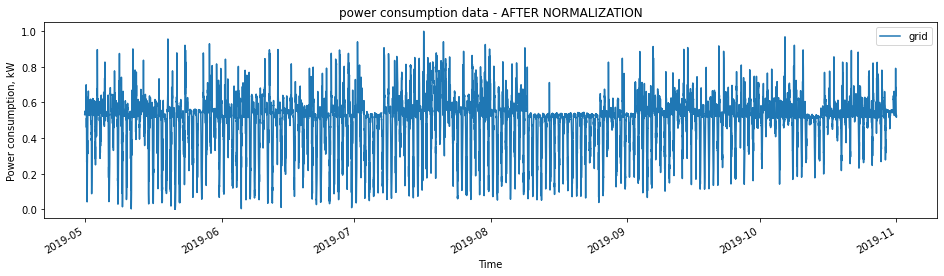

In [56]:
df_norm.plot(figsize=(16,4),legend=True)

plt.title('power consumption data - AFTER NORMALIZATION')

plt.ylabel('Power consumption, kW')

plt.xlabel('Time')

plt.show()

In [15]:
df_norm.shape

(17664, 1)

In [16]:
df.shape #see rows number 

(17664, 1)

# Build a SIMPLE RNN model for 1 house

In [44]:
def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
        
        
     #splitting the data for the test and training 
    
#I CHANGED 1100000 into 110000!!!!!!!
    
    #1 last 6189 days are going to be used in test 
    X_test = X_train[11000:]             
    y_test = y_train[11000:]
    
    #2 first 110000 days are going to be used in training
    X_train = X_train[:11000]           
    y_train = y_train[:11000]
    
    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into RNN models
    X_train = np.reshape(X_train, (11000, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]


In [45]:
seq_len = 20 #choose sequence length

X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (11000, 20, 1)
y_train.shape =  (11000,)
X_test.shape =  (6644, 20, 1)
y_test.shape =  (6644,)


In [46]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 20, 40)            1680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 20, 40)            3240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 40)                3240      
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [47]:
#compiling the model with test and training, x is a date, y is consumption 
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=1000) #defining input, the rusult is a framemodel for predictions 

Epoch 1/10
11000/11000 [==============================] - 10s 888us/step - loss: 0.4311
Epoch 2/10
11000/11000 [==============================] - 4s 323us/step - loss: 0.1831
Epoch 3/10
11000/11000 [==============================] - 4s 321us/step - loss: 0.1491
Epoch 4/10
11000/11000 [==============================] - 4s 324us/step - loss: 0.1265
Epoch 5/10
11000/11000 [==============================] - 4s 344us/step - loss: 0.1102
Epoch 6/10
11000/11000 [==============================] - 4s 328us/step - loss: 0.0967
Epoch 7/10
11000/11000 [==============================] - 4s 333us/step - loss: 0.0841
Epoch 8/10
11000/11000 [==============================] - 4s 324us/step - loss: 0.0761
Epoch 9/10
11000/11000 [==============================] - 4s 325us/step - loss: 0.0675
Epoch 10/10
11000/11000 [==============================] - 4s 350us/step - loss: 0.0622


In [48]:
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

R2 Score of RNN model =  0.6964241985684976


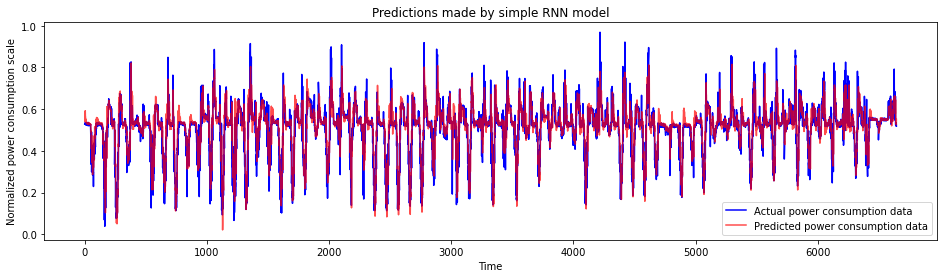

In [50]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='red',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")

# Build a SIMPLE LSTM model 

In [51]:
lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 40)            6720      
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 40)            12960     
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dropout_6 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [52]:
lstm_model.compile(optimizer="adam",loss="MSE")
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
11000/11000 [==============================] - 23s 2ms/step - loss: 0.1254
Epoch 2/10
11000/11000 [==============================] - 14s 1ms/step - loss: 0.0330
Epoch 3/10
11000/11000 [==============================] - 14s 1ms/step - loss: 0.0247
Epoch 4/10
11000/11000 [==============================] - 14s 1ms/step - loss: 0.0215
Epoch 5/10
11000/11000 [==============================] - 14s 1ms/step - loss: 0.0204
Epoch 6/10
11000/11000 [==============================] - 14s 1ms/step - loss: 0.0197
Epoch 7/10
11000/11000 [==============================] - 14s 1ms/step - loss: 0.0189
Epoch 8/10
11000/11000 [==============================] - 14s 1ms/step - loss: 0.0183
Epoch 9/10
11000/11000 [==============================] - 16s 1ms/step - loss: 0.0179
Epoch 10/10
11000/11000 [==============================] - 16s 1ms/step - loss: 0.0175


In [53]:
lstm_predictions = lstm_model.predict(X_test)

lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)

R^2 Score of LSTM model =  0.40399409215225934


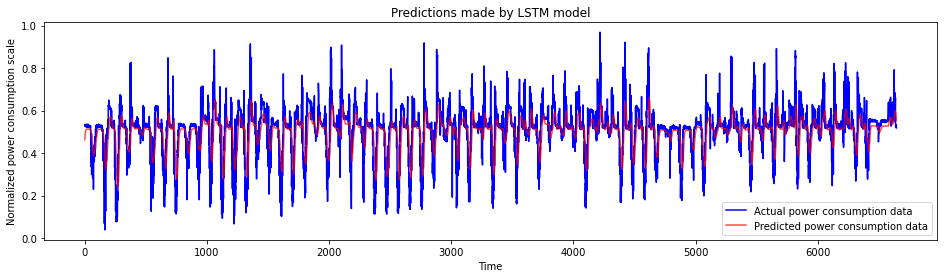

In [54]:
plot_predictions(y_test, lstm_predictions, "Predictions made by LSTM model")

# metadata.csv and 15_min_NY_data.csv (25 houses) analysis

houses with cars from metadata:  1222,  3000,  3976,  9973, 11435,  9053,  6178,  5679,    27,
        3517,   518,  5058,  2126, 10202,  8577
        
all houses in NY: 4550,  558, 2358, 3700, 1417, 5679, 5058, 2318, 5997,  950, 5982,
       5587, 1222,  387, 3000, 4283, 3488, 3517, 9053, 3996,   27,  142,
        914, 2096, 1240
        
houses with cars in NY: 27, 1222, 3000, 9053, 5679, 3517, 5058, 

In [7]:
article_read['dataid'].unique() #Valeria create a loop to check if the houses have cars, generations, batteries

array([4550,  558, 2358, 3700, 1417, 5679, 5058, 2318, 5997,  950, 5982,
       5587, 1222,  387, 3000, 4283, 3488, 3517, 9053, 3996,   27,  142,
        914, 2096, 1240])

In [220]:
one_house_NY= article_read[(article_read['dataid']==27)][['grid', 'local_15min', 'solar', 'car1']]

one_house_NY.head()

,grid,local_15min,solar,car1
80,-4.386,2019-06-29 14:45:00-05,4.895,0.003
81,-3.609,2019-06-29 14:30:00-05,4.163,0.003
82,-7.870,2019-06-29 14:15:00-05,8.433,0.003
83,-2.431,2019-06-29 14:00:00-05,3.083,0.003
104,-0.699,2019-06-24 14:45:00-05,4.565,3.380


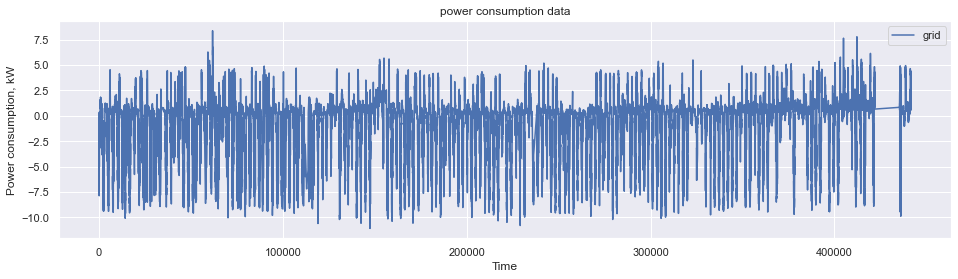

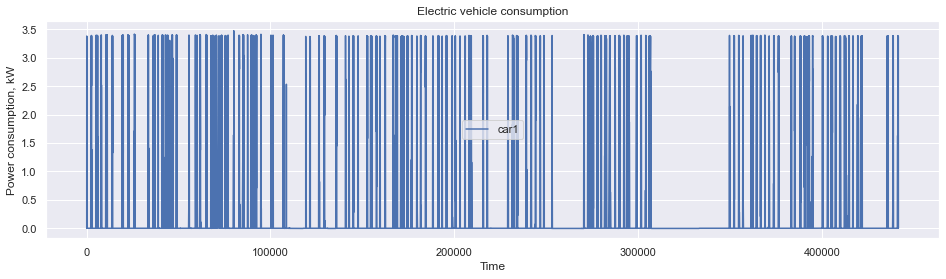

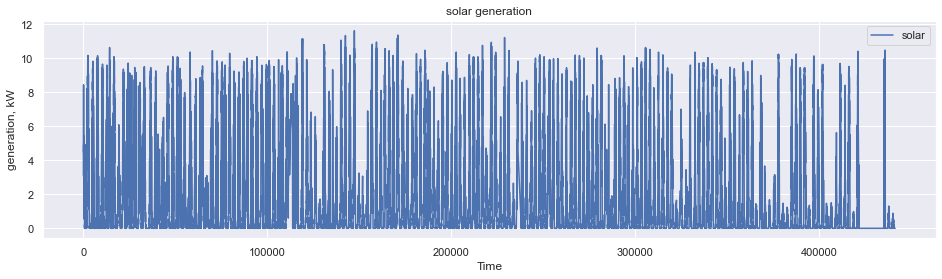

In [229]:
#1
one_house_NY['grid'].plot(figsize=(16,4),legend=True)

plt.title('power consumption data')

plt.ylabel('Power consumption, kW')

plt.xlabel('Time')

plt.show()

#2

one_house_NY['car1'].plot(figsize=(16,4),legend=True)

plt.title('Electric vehicle consumption')

plt.ylabel('Power consumption, kW')

plt.xlabel('Time')
plt.show()

#3
one_house_NY['solar'].plot(figsize=(16,4),legend=True)

plt.title('solar generation')

plt.ylabel('generation, kW')

plt.xlabel('Time')
plt.show()

In [ ]:
#sns.scatterplot(data=one_house_NY, x="local_15min", y="grid")

#sns.set(rc={'figure.figsize': (11, 4)})
#solar_plot = days['grid_kwh'].plot(linewidth=0.5, marker='.')
#solar_plot.set_xlabel('Date')
#solar_plot.set_ylabel('Grid Usage kWh')
#solar_plot.set_title('Average Grid Usage in Austin, TX')

# display the plot

#plt.show()

In [96]:
df_meta= pd.read_csv('metadata.csv', skiprows=[1])

df_meta.head()


,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,...,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
0,2836,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
1,2743,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
2,5323,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
3,8560,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN
4,3313,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN


# #Как выбрать строки из Pandas DataFrame по условию
**df.loc[df.column name condition]**
 
OR
df_state = df_meta ['state']. isin (['New York']) 
df_meta[df_state]

In [217]:
NY = df_meta.loc[(df_meta.state == 'New York')& 
                 (df_meta.active_record == 'yes')&
                 (df_meta.car1 == 'yes')]
#NY = df_meta.loc[df_meta.state == 'New York']
NY.head()


,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,...,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
62,1222,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-04-17 19:00:00-05:00,2021-01-31 02:59:00-06:00,100%,2019-04-17 19:00:00-05:00,2021-01-31 00:00:00-06:00,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,3000,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-03-11 19:00:00-05:00,2021-01-31 02:59:00-06:00,100%,2019-03-11 19:00:00-05:00,2021-01-31 02:00:00-06:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,3976,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-04-02 19:00:00-05:00,2020-09-05 10:59:00-05:00,99%,2019-04-02 19:00:00-05:00,2020-09-05 09:00:00-05:00,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,9973,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-02-21 13:00:00-06:00,2021-01-31 02:59:00-06:00,86%,2019-02-21 14:00:00-06:00,2021-01-31 02:00:00-06:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,11435,yes,Single-Family Home 001 (Master),Dryden,New York,2019-10-09 19:00:00-05:00,2019-12-07 06:59:00-06:00,99%,2019-10-09 19:00:00-05:00,2019-12-07 06:00:00-06:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
NY['city'].unique()

array(['Ithaca', 'Trumansburg', 'Brooktondale', 'Locke', 'Lansing',
       'Groton', 'Dryden', 'King Ferry', 'Freeville', 'Newfield',
       'Slaterville Springs'], dtype=object)

In [133]:
NY['car1'].value_counts()

yes    15
Name: car1, dtype: int64

In [134]:
NY['car2'].value_counts()

yes    1
Name: car2, dtype: int64

In [135]:
NY['solar'].value_counts()

yes    64
Name: solar, dtype: int64

In [136]:
NY['solar2'].value_counts()

yes    6
Name: solar2, dtype: int64

In [218]:
NY['dataid'].unique()

array([ 1222,  3000,  3976,  9973, 11435,  9053,  6178,  5679,    27,
        3517,   518,  5058,  2126, 10202,  8577])

In [138]:
NY['active_record'].value_counts()

yes    115
Name: active_record, dtype: int64

<AxesSubplot:>

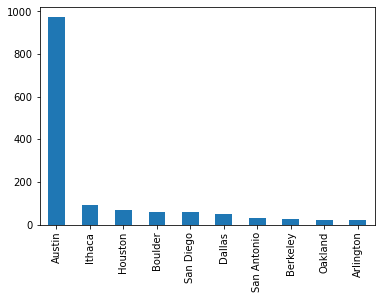

In [139]:
cars_counts = df_meta['city'].value_counts()

cars_counts[:10].plot(kind='bar')

In [140]:
one_house= NY[NY['dataid']==914]

one_house.head()

,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,...,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
127,914,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-02-15 18:00:00-06:00,2021-01-31 02:59:00-06:00,68%,2019-02-15 18:00:00-06:00,2021-01-31 01:00:00-06:00,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
article_read.grid.sum() #sums up all values in grid 

128070.65300000003

In [142]:
article_read.grid.min()

-16.831

In [60]:
article_read.grid.max()


20.955

In [62]:
article_read.grid.mean()

0.2900157224087917

In [63]:
article_read.grid.median()

0.436

In [68]:
article_read.groupby('grid').mean()
article_read.groupby('grid').count()[['dataid']] # keep only 1 colomn 

,dataid
grid,
-16.831,1
-16.524,1
-16.515,1
-16.498,1
-16.415,1
...,...
14.257,1
15.748,1
16.659,1


# METADATA taken from https://github.com/Pecan-Street/DataPort-Examples

change it to New York

              dataid           grid
count  558839.000000  556165.000000
mean     5305.848506       0.841128
std      2810.143155       1.669599
min       661.000000      -7.650000
25%      3039.000000       0.274000
50%      5746.000000       0.588000
75%      7951.000000       1.437000
max      9922.000000      15.522000
            dataid        grid    grid_kwh
count   365.000000  365.000000  365.000000
mean   5306.636214    0.842069   20.209660
std      52.200008    0.526361   12.632675
min    5195.804348   -0.136730   -3.281516
25%    5300.937500    0.387246    9.293906
50%    5300.937500    0.796572   19.117719
75%    5300.937500    1.259121   30.218906
max    5867.442724    2.284069   54.817658


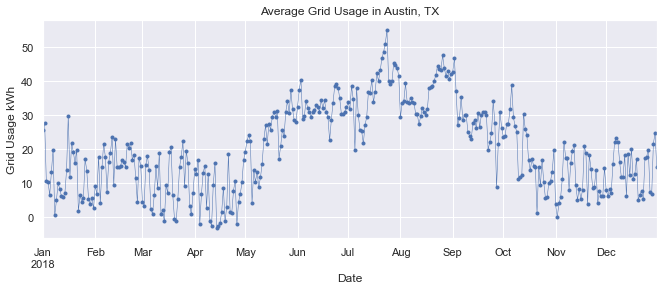

done


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This constant limits the number of rows read in from the big CSV file.
# Set to None if you want to read the whole thing
LIMIT = None

if not os.path.isfile('metadata.csv'):
    print("Could not find metadata.csv file in {} .".format(os.getcwd()))
    exit(1)
if not os.path.isfile('15minute_data_austin.csv'):
    print("Could not find 15minute_data_austin.csv file in {} .".format(os.getcwd()))
    exit(1)

# read in the metadata file, skip the 2nd row because it has the comments further describing the headers
metadata = pd.read_csv('metadata.csv', engine='python', encoding="ISO-8859-1", skiprows=[1])


# filter down to our houses of interest. Active, Austin-based, has complete data, and has the grid circuit
dataids = metadata[metadata.active_record.eq('yes') &
                   metadata.city.eq('Austin') &
                   metadata.egauge_1min_data_availability.isin(['100%', '99%', '98%', '97%']) &
                   metadata.grid.eq('yes')]


# read the 15 minute data file for Austin
all_data = pd.read_csv('15minute_data_austin.csv', engine='python', encoding="ISO-8859-1",
                                  parse_dates=['local_15min'], index_col=['local_15min'],
                                  usecols=['dataid', 'local_15min', 'grid'],
                                  nrows=LIMIT)

# filter down to the dataids we're interested in
filt = all_data[all_data.dataid.isin(dataids.dataid)]

filt.index = pd.to_datetime(filt.index, utc=True, infer_datetime_format=True)
filt = filt.tz_convert('US/Central')

print(filt.describe())

# group the data by days and take the mean of those
days = filt.groupby(pd.Grouper(freq='D')).mean()

# convert from kW to kWh
days['grid_kwh'] = days['grid'].apply(lambda x: x * 24)

print(days.describe())

# create the plot
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize': (11, 4)})
solar_plot = days['grid_kwh'].plot(linewidth=0.5, marker='.')
solar_plot.set_xlabel('Date')
solar_plot.set_ylabel('Grid Usage kWh')
solar_plot.set_title('Average Grid Usage in Austin, TX')

# display the plot
plt.show()

print('done')
exit(0)